# Panel Data

- Balanced panel datasets have the same number of observations for all groups.
- Unbalanced panel datasets have missing values at some time observations for some of the groups.

Panel data series modeling centers around addressing the likely dependence across data observations within the same group.

### Homogenous model

$$
y_{it} = \alpha + \beta x_{it} + \epsilon_{it}
$$

- he constant $\alpha$ is the same across groups and time.
- The coefficient $\beta$ is constant across groups and time.
- Any differences across groups enter the model only through the error term, $\epsilon_{it}$.

### Heterogenous model

$$
y_{it} = \alpha_i + \beta x_{it} + \epsilon_{it}
$$

We'll assume the data generation process
$$
y_{it} = \beta x_{it} + \delta z_i + \epsilon_{it}
$$

- $x_i$ - These are observable characteristics. These characteristics may be constant for an individual across all time, such as race, or may vary across all time observations for an individual such as age.	

- $z_i$ - Unobservable characteristics, responsible for model heterogeneity.
- $\epsilon$ - Stochastic error term

We can simulate our data

In [25]:
import numpy as np

n, t = 3, 120
beta, delta = 0.75, 0.34

z = np.random.normal(loc=5, scale=4, size=n)
x = np.random.uniform(low=10, high=40, size=[t, n])
epsilon = np.random.normal(loc=5, scale=4, size=[t, n])

y = beta * x + delta * z + epsilon

<AxesSubplot:>

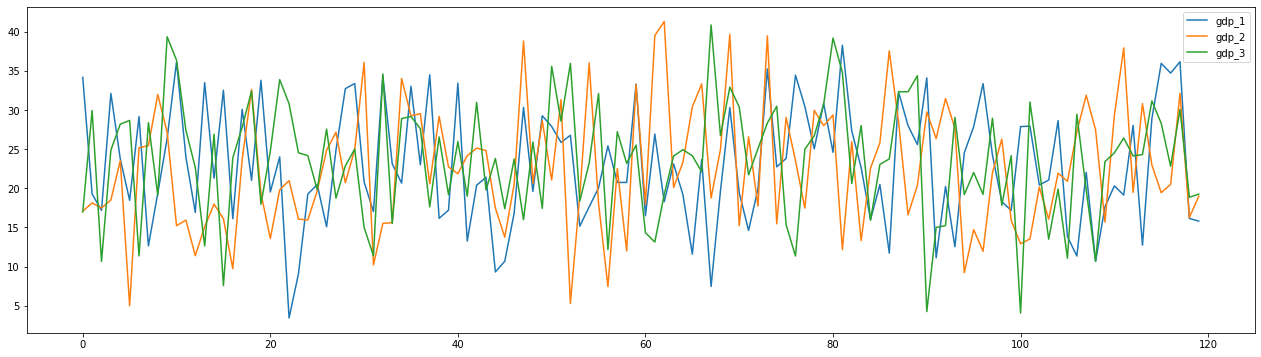

In [26]:
import pandas as pd

df = pd.DataFrame(y, columns=["gdp_1", "gdp_2", "gdp_3"])
df.plot(figsize=(22, 6))

### What Is Pooled Ordinary Least Squares?

n some cases, there are no unobservable individual-specific effects, and  is constant across individuals. This is a strong assumption and implies that all the observations within groups are independent of one another.

In these cases, the model becomes

$$
y_{it} = \beta x_{it} + \alpha + \epsilon_{it}
$$

In [27]:
import numpy as np

n, t = 3, 120
beta, alpha = 0.75, 30

x = np.random.uniform(low=10, high=40, size=[t, n])
epsilon = np.random.normal(loc=5, scale=4, size=[t, n])

y = beta * x + delta * z + epsilon

<AxesSubplot:>

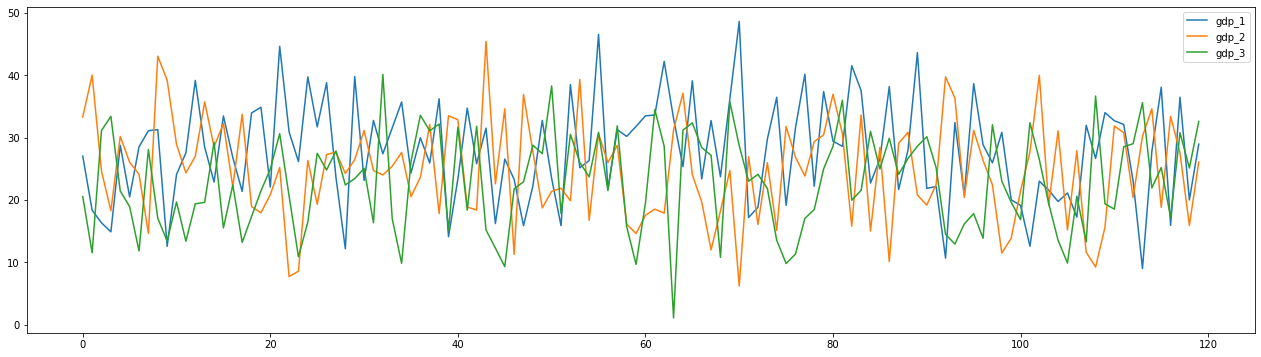

In [28]:
df = pd.DataFrame(y, columns=["gdp_1", "gdp_2", "gdp_3"])
df.plot(figsize=(22, 6))

In [31]:
from linearmodels import PooledOLS
mod = PooledOLS(y, x)
res = mod.fit(cov_type='clustered', cluster_entity=True)
res

Dep. Variable:,Dep,R-squared:,0.9679
Estimator:,PooledOLS,R-squared (Between):,0.9927
No. Observations:,360,R-squared (Within):,0.7209
Date:,"Tue, Apr 19 2022",R-squared (Overall):,0.9679
Time:,13:07:13,Log-likelihood,-1071.1
Cov. Estimator:,Clustered,,
,,F-statistic:,1.082e+04
Entities:,3,P-value,0.0000
Avg Obs:,120.00,Distribution:,"F(1,359)"
Min Obs:,120.00,,
Max Obs:,120.00,F-statistic (robust):,486.17


In [37]:
from scipy.stats import linregress

linregress(x[:,1], y[:,1])

LinregressResult(slope=0.8146963601740098, intercept=4.976105189635426, rvalue=0.8915091294664339, pvalue=2.1573474903117847e-42, stderr=0.038109196780950635, intercept_stderr=0.9871790801362299)

In [46]:
import statsmodels.api as sm
# from scipy.stats import linregr
linregress(x,y)

ValueError: too many values to unpack (expected 4)